# Pre-Process Credit Card Transaction Data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
df = pd.read_excel('C:\\Users\\biboy\\Desktop\\PJDSC\\dataset\\CREDIT CARD TXNS_PJDSC.xlsx')

In [6]:
df.to_csv('CREDIT CARD TXNS_PJDSC')

In [7]:
df.head()

,CUST_NUM,MERCH_GROUP,DATE,AMOUNT,CHANNEL,MERCH_NAME,COUNTRY
0,3016.966026,Retail Outlet Services,2023-04-01,3211.528727,POS-RETAIL PURCHASE,MERCHANT 1,PH
1,3016.966026,Clothing Stores,2023-04-01,3982.218215,POS-RETAIL PURCHASE,MERCHANT 2,PH
2,3016.966026,Miscellaneous Stores,2023-04-18,872.539734,POS-RETAIL PURCHASE,MERCHANT 3,PH
3,3016.966026,Miscellaneous Stores,2023-04-27,390.082187,POS-RETAIL PURCHASE,MERCHANT 4,PH
4,3016.966026,Retail Outlet Services,2023-04-29,4956.055464,ONLINE-RETAIL PURCHASE,MERCHANT 5,PH


In [18]:
df.tail()

,CUST_NUM,MERCH_GROUP,DATE,AMOUNT,CHANNEL,MERCH_NAME,COUNTRY
33121,11155.492100,NaN,2023-06-30,799.443307,ONLINE-RETAIL PURCHASE,MERCHANT 12,COUNTRY 9
33122,6159.706324,Miscellaneous Stores,2023-06-30,436.104978,ONLINE-RETAIL PURCHASE,MERCHANT 459,PH
33123,6159.706324,Miscellaneous Stores,2023-06-30,439.966370,ONLINE-RETAIL PURCHASE,MERCHANT 459,PH
33124,1154.341371,Miscellaneous Stores,2023-06-30,10069.359649,POS-RETAIL PURCHASE,MERCHANT 154,PH
33125,8025.697602,Retail Outlet Services,2023-06-30,2015.328394,POS-RETAIL PURCHASE,MERCHANT 68,PH


Findings: A missing value is apparent in the tail of the MERCH_GROUP column.

In [10]:
df.shape

(33126, 7)

Findings: There are 33,126 rows and 7 columns in total for the Credit Card Transactions

In [13]:
df.isna().sum()

CUST_NUM          0
MERCH_GROUP    1568
DATE              0
AMOUNT            0
CHANNEL           0
MERCH_NAME        0
COUNTRY        1249
dtype: int64

Findings: The columns CUST_NUM, DATE, AMOUNT, CHANNEL, and MERCH_NAME are complete, while MERCH_GROUP has 1,568 missing values and COUNTRY has 1,249 missing values.


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CUST_NUM     33126 non-null  float64       
 1   MERCH_GROUP  31558 non-null  object        
 2   DATE         33126 non-null  datetime64[ns]
 3   AMOUNT       33126 non-null  float64       
 4   CHANNEL      33126 non-null  object        
 5   MERCH_NAME   33126 non-null  object        
 6   COUNTRY      31877 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.8+ MB


-The dataset seems to be transactional, with details about customer transactions, including the amount, date, merchant, and country.

-There are missing values in the MERCH_GROUP and COUNTRY columns that we need to address. 

-The CUST_NUM being a float might need investigation. If it's supposed to be an identifier, one might consider converting it to an integer or string.

-The presence of a DATE column indicates potential for time series analysis or feature extraction related to time (e.g., day of the week, month).

-The categorical columns (MERCH_GROUP, CHANNEL, MERCH_NAME, COUNTRY) might need encoding if used for machine learning models. 

In [21]:
df.describe()

,CUST_NUM,AMOUNT
count,33126.000000,33126.000000
mean,9633.287143,3244.012944
std,3226.580055,12937.493905
min,206.450963,0.000000
25%,7334.440947,406.336497
50%,10136.825045,963.776532
75%,12403.527079,2285.339098
max,14139.061638,800021.252212


Findings: 

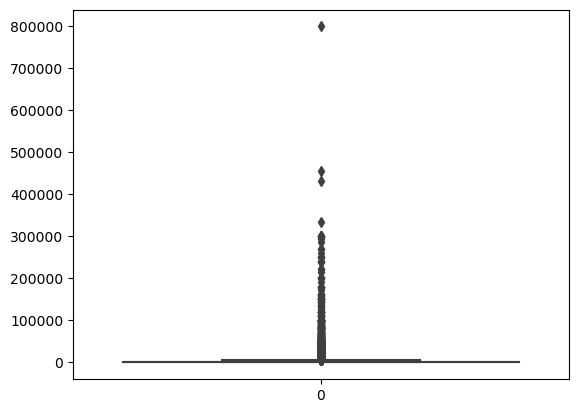

In [21]:
# Box plot visualization for 'AMOUNT' column
sns.boxplot(df['AMOUNT'])
plt.show()


Findings:

In [22]:
# IQR method for 'AMOUNT' column
Q1 = df['AMOUNT'].quantile(0.25)
Q3 = df['AMOUNT'].quantile(0.75)
IQR = Q3 - Q1

#filter = (df['AMOUNT'] >= Q1 - 1.5 * IQR) & (df['AMOUNT'] <= Q3 + 1.5 * IQR)
#df = df[filter]

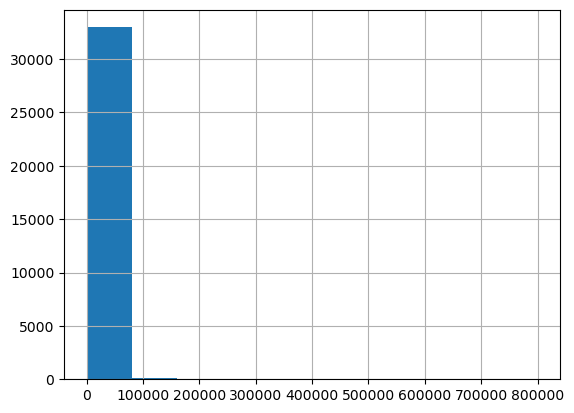

In [12]:
df['AMOUNT'].hist()
plt.show()

Findings:

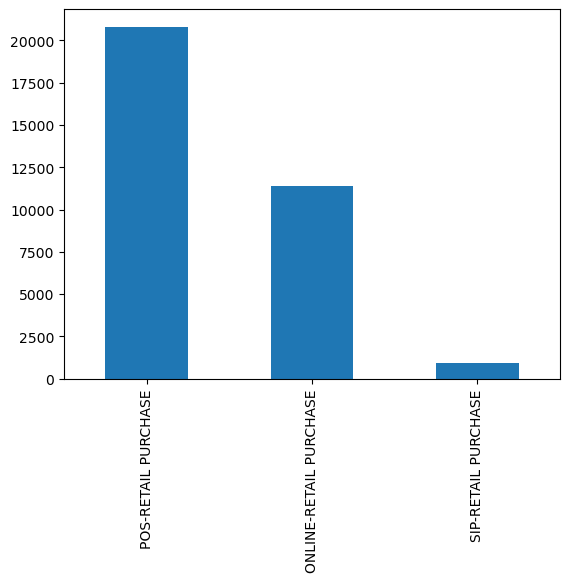

In [14]:
df['CHANNEL'].value_counts().plot(kind='bar')
plt.show()

Findings: 

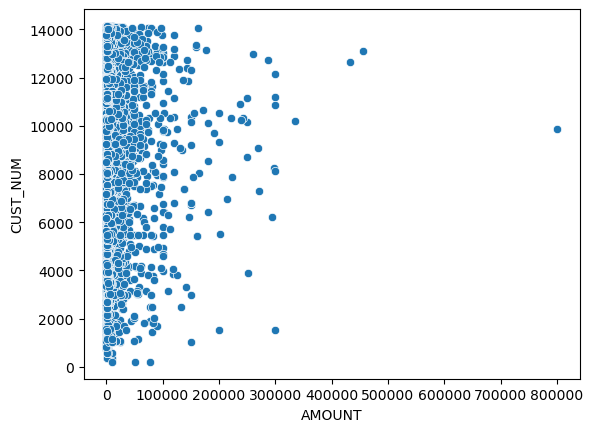

In [15]:
sns.scatterplot(data=df, x='AMOUNT', y='CUST_NUM')
plt.show()

Findings:

C:\Users\biboy\AppData\Local\Temp\ipykernel_10932\221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


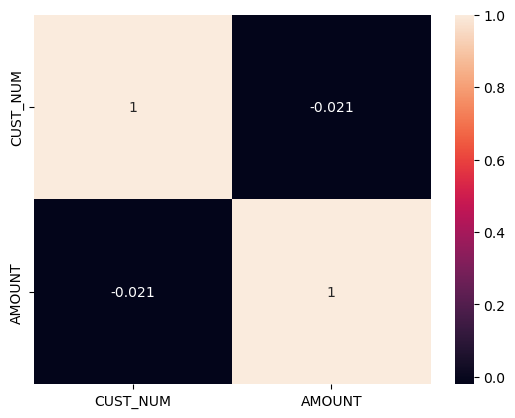

In [16]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Findings:

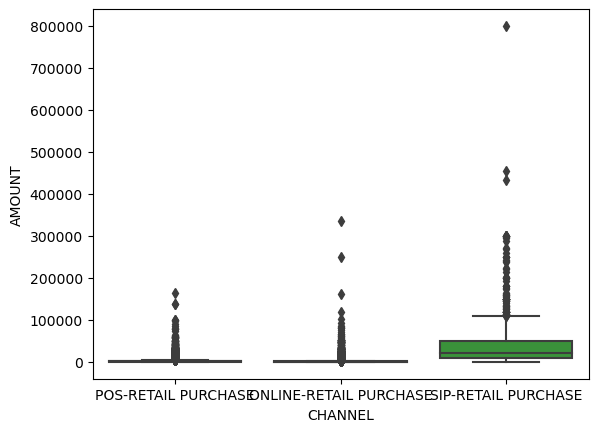

In [17]:
sns.boxplot(data=df, x='CHANNEL', y='AMOUNT')
plt.show()


Findings:

In [18]:
df['MERCH_GROUP'].fillna('Unknown', inplace=True)
df['COUNTRY'].fillna('Not Provided', inplace=True)


In [19]:
df.tail()

,CUST_NUM,MERCH_GROUP,DATE,AMOUNT,CHANNEL,MERCH_NAME,COUNTRY
33121,11155.492100,Unknown,2023-06-30,799.443307,ONLINE-RETAIL PURCHASE,MERCHANT 12,COUNTRY 9
33122,6159.706324,Miscellaneous Stores,2023-06-30,436.104978,ONLINE-RETAIL PURCHASE,MERCHANT 459,PH
33123,6159.706324,Miscellaneous Stores,2023-06-30,439.966370,ONLINE-RETAIL PURCHASE,MERCHANT 459,PH
33124,1154.341371,Miscellaneous Stores,2023-06-30,10069.359649,POS-RETAIL PURCHASE,MERCHANT 154,PH
33125,8025.697602,Retail Outlet Services,2023-06-30,2015.328394,POS-RETAIL PURCHASE,MERCHANT 68,PH


The missing values are replaced with unique identifiers given its low proportion to the overall dataset. Missing values for the Merch_Group are flagged as "Unknown" while missing values for the Country are flagged as "Not Provided".

In [20]:
for col in df.select_dtypes(['object']).columns:
    print(col, df[col].nunique())


MERCH_GROUP 13
CHANNEL 3
MERCH_NAME 3008
COUNTRY 41


Findings: The dataset contains categorical columns with varying cardinalities: MERCH_GROUP has 13 categories, CHANNEL has 3, MERCH_NAME features 3008 unique merchant names, and COUNTRY represents 41 distinct countries.